### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**


#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(color_codes=True) # adds a nice background to the graphs


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
data=pd.read_csv('data.csv') # read the data as a data frame
item=pd.read_csv('item.csv')
user=pd.read_csv('user.csv')

In [4]:
 data.head()#checking the head of the data frame


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
item.head()#checking the head of the data frame

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
user.head()#checking the head of the data frame

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [7]:
data.info() #info about the data 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


#### The data has 100,000 movies with 4 attributes. 4 integer type. the first one is movie ID, There is no-null values

In [8]:
print('data describe is :')  #five point summary of the continuous attributes
data.describe().T



data describe is :


,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


 ####  The rating row shows 50 and 75 quartiles of data has similar rating saying the data is skewed. 

In [9]:
print('data shape is :') #size of the dataset
print(data.shape)

data shape is :
(100000, 4)


In [10]:
pd.DataFrame( data.isnull().sum(), columns= ['Number of missing values']) 


,Number of missing values
user id,0
movie id,0
rating,0
timestamp,0


In [11]:
#or we can check null values by:
data.isna().apply(pd.value_counts) 

,user id,movie id,rating,timestamp
False,100000,100000,100000,100000


all the instances are ok, no null value

In [12]:
print('item info is:')
print(item.info())
print('item describe is :')
print(item.describe().T)
print('item shape is :')
print(item.shape)
pd.DataFrame( item.isnull().sum(), columns= ['Number of missing values'])


item info is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int6

,Number of missing values
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


#### Item data has 1681 movies with 22 columns  for diffrent genres where 2 of the columns are object (movie title and release data). There is no null value in the data. 

In [13]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [14]:
print('user info is:')
print(user.info())
print('user describe is :')
print(user.describe().T)
print('user shape is :')
print(user.shape)
pd.DataFrame( user.isnull().sum(), columns= ['Number of missing values'])
#### similar 

user info is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
user describe is :
         count        mean         std  min    25%    50%    75%    max
user id  943.0  472.000000  272.364951  1.0  236.5  472.0  707.5  943.0
age      943.0   34.051962   12.192740  7.0   25.0   31.0   43.0   73.0
user shape is :
(943, 5)


,Number of missing values
user id,0
age,0
gender,0
occupation,0
zip code,0


#### User data has 943user info and 5 columns where 3 of them are object (categorical: usergender, occupation, zip code). There is no missing values. The range of age of the users varies from 7 to 73

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [15]:
# use sum on the default axis
pd.DataFrame( item.iloc[:,3:].sum(), columns= ['Number of movies per genre'])


,Number of movies per genre
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


#### 5. Find the movies that have more than one genre - 5 marks

In [16]:
#hint: use sum on the axis = 1
z=item.iloc[:,2:].sum(axis=1)
pd.DataFrame({'movies that have more than one genre': item['movie title'][z>1]})


,movies that have more than one genre
0,Toy Story
1,GoldenEye
3,Get Shorty
4,Copycat
6,Twelve Monkeys
...,...
1667,MURDER and murder
1668,Tainted
1671,Mirage
1677,B. Monkey


#### 849 movies from 1681 movies have more than 1 genre

### 6. Drop the movie where the genre is unknown - 2.5 marks

In [17]:
#item_copy=item.copy() #make the copy of the item
item[item['unknown']==1] #fine the item which has unknown attr. as 1
print('number the movie where the genre is unknown before dropping', item['unknown'].sum())
                                   #drop the item with unknown attr. as 1
item.drop(item[item['unknown']==1].index,inplace=True)
print('number the movie where the genre is unknown after dropping', item['unknown'].sum())

item.shape

number the movie where the genre is unknown before dropping 1
number the movie where the genre is unknown after dropping 0


(1680, 22)

#### only one movie has unkonwn genre

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [18]:
# HINT: Use distplot for age and countplot for gender,ratings,occupation. Use lineplot or countplot for release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)

In [19]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


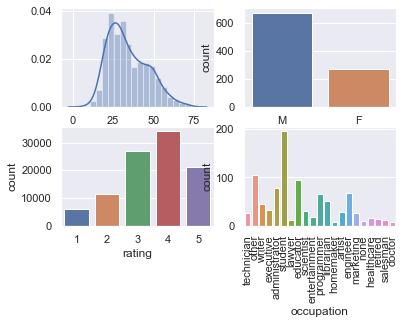

In [20]:
#your answers here
#age, gender, rating and occupation are plotted in one figure with subfigures
plt.subplot(2,2,1)
sns.distplot(user['age'])
plt.subplot(2,2,2)
sns.countplot(user['gender']);
plt.subplot(2,2,3)
sns.countplot(data['rating']);
plt.subplot(2,2,4)
chart=sns.countplot(user['occupation']);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

#### Users mostly have age around 30, are more Men , rating 4 is the most rating the users gave , and studen is the most occupation of the users. 

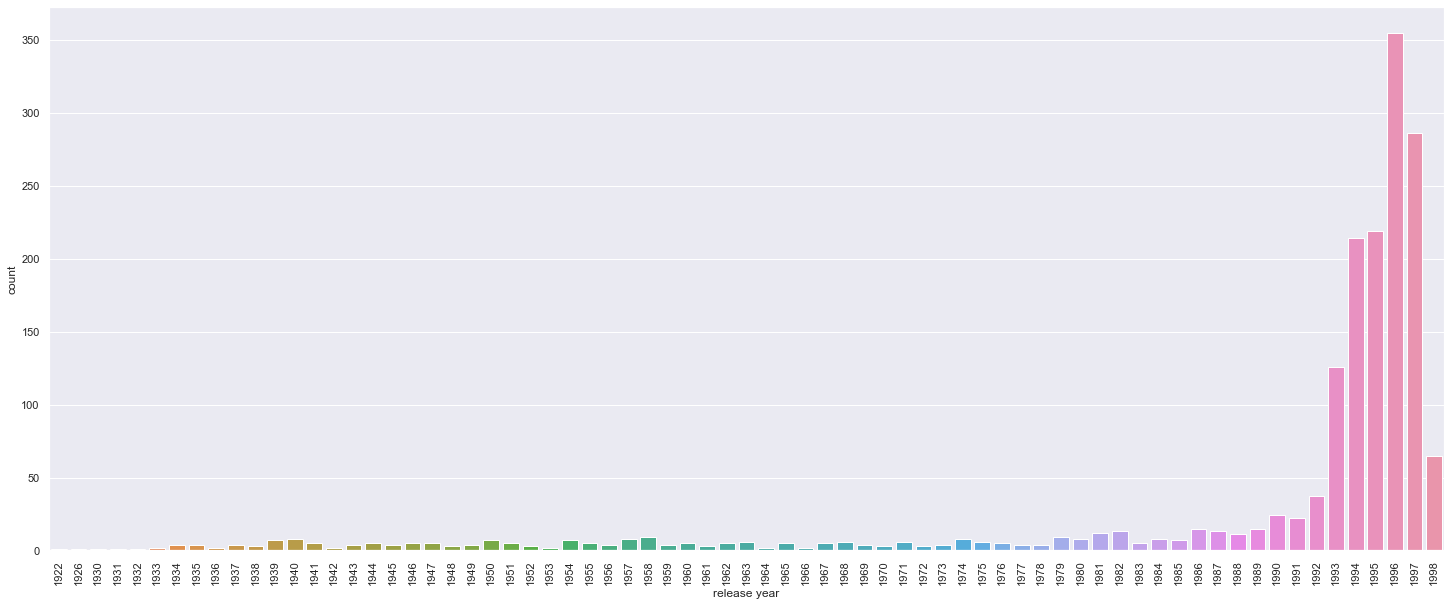

In [21]:
# print release year
plt.figure(figsize=(25,10))
item['release year']=item['release date'].apply(lambda x: pd.Series(str(x).split('-')[2]))
chart=sns.countplot(item['release year'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

#### year 1996 has the maximum release 

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

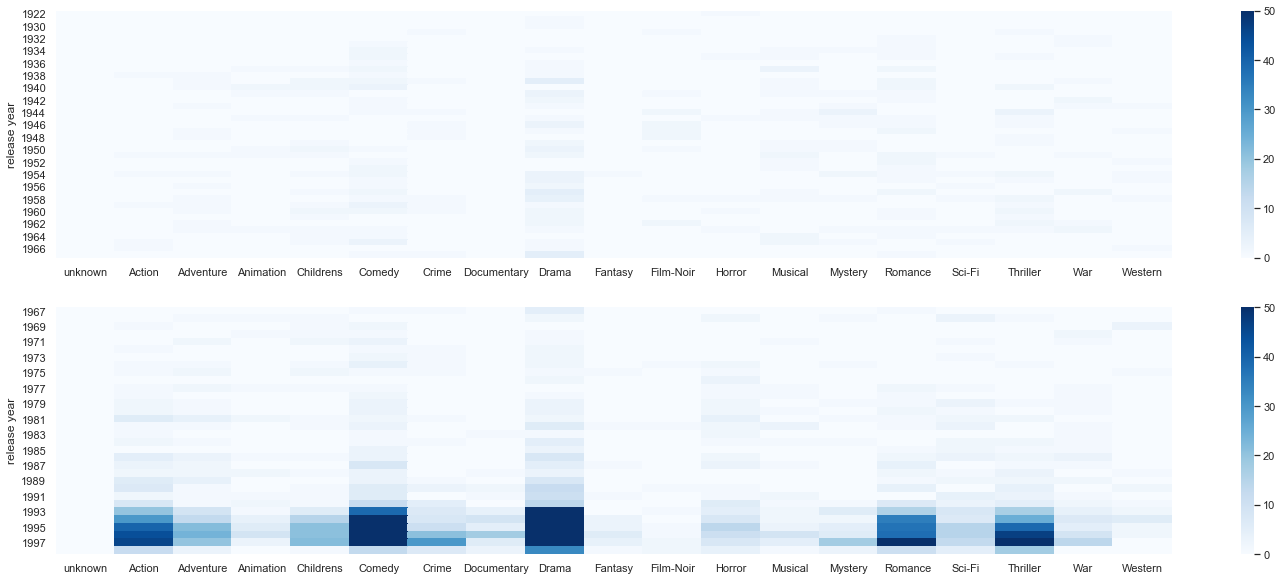

In [22]:
#Your answer here
plt.figure(figsize=(25,10))

df_releaseyear=item.groupby(['release year']).sum()
df_releaseyear.drop(columns=['movie id'],inplace=True)
#we make two heatmap for better visualisation 
plt.subplot(2,1,1)
#year  1922-1966
sns.heatmap(df_releaseyear.iloc[0:40,:],cmap="Blues",vmin=0, vmax=50)
plt.subplot(2,1,2)
#year  1966-1998
sns.heatmap(df_releaseyear.iloc[39:72,:],cmap="Blues",vmin=0, vmax=50)


#### Drama and Comedy have maximum release changes 

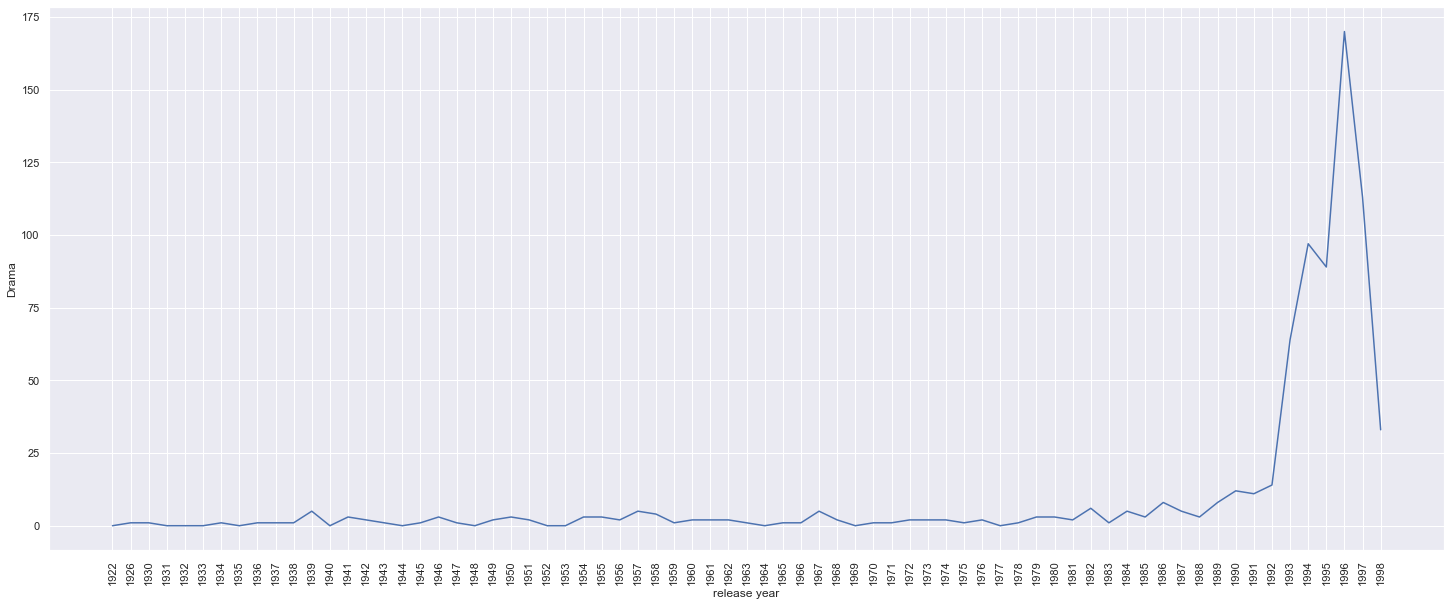

In [23]:
#Drama showing maximum release chnage 
plt.figure(figsize=(25,10))
sns.lineplot(df_releaseyear.index,df_releaseyear['Drama'])
plt.xticks(rotation=90);

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. 
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.
4. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [24]:
movie_rating = pd.merge(data, item)
#Find the average rating of all the movies and sort them in the descending order .
movie_avg_rating = movie_rating.groupby('movie title')['rating'].mean().sort_values(ascending=False)
#Find the size of rating of all the movies and sort them in the descending order .
movie_size_rating = movie_rating.groupby('movie title')['rating'].size().sort_values(ascending=False)
#dataframe based on movie title, avg and size of the rating 
df_temp=pd.DataFrame({'rating_mean':movie_avg_rating,'rating_size':movie_size_rating})
#find the movies with 100 ranking
ranking_100 = df_temp['rating_size'] > 100
#find the movies with 100 ranking in avg ranking and sort the first 25
thefirst_25=movie_avg_rating[ranking_100].sort_values(ascending=False)[:25]
pd.DataFrame({'the_first_25':thefirst_25})

,the_first_25
movie title,
"Close Shave, A",4.491071
Schindler's List,4.466443
"Wrong Trousers, The",4.466102
Casablanca,4.456790
"Shawshank Redemption, The",4.445230
Rear Window,4.387560
"Usual Suspects, The",4.385768
Star Wars,4.358491
12 Angry Men,4.344000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [25]:
# all data in one data frame 
data_user = pd.merge(data, user)
item_data_user=pd.merge(data_user, item)
#group all coloumns by gender
df_gender=item_data_user.groupby('gender').sum()
#in new gender dataframe we have just genre information per gender
df_gender.drop(columns=['user id','movie id','rating','timestamp','age'],inplace=True)
#make a new column for total number of men and women 
df_gender['total gender']=df_gender.sum(axis=1)
#divide each genre rating to total to see the ratio for each genre
df_gender.iloc[:,0:].div(df_gender['total gender'], axis=0)*100


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total gender
gender,,,,,,,,,,,,,,,,,,,,
F,0.0,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,0.0,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


#### write the conclusions here
#### In Total the population of the voters are most men (158884 vs 53701). To compare fairly, we divide each genre by its gender total populatopn and here are the conclusions:
#### 1. 18.181189 of Men watch Drama however 20.498687 of women watch drama. So Women watch Drama more than men. 
#### 2. 6.357468 of Men watch science fiction vs 4.895626 of Women Population so Men watch more Sci-Fi than Women. 
#### 3. 10.908549 of women population watch Romance vs 8.561592 of Men. So Women watch more Romance compared to Men. 


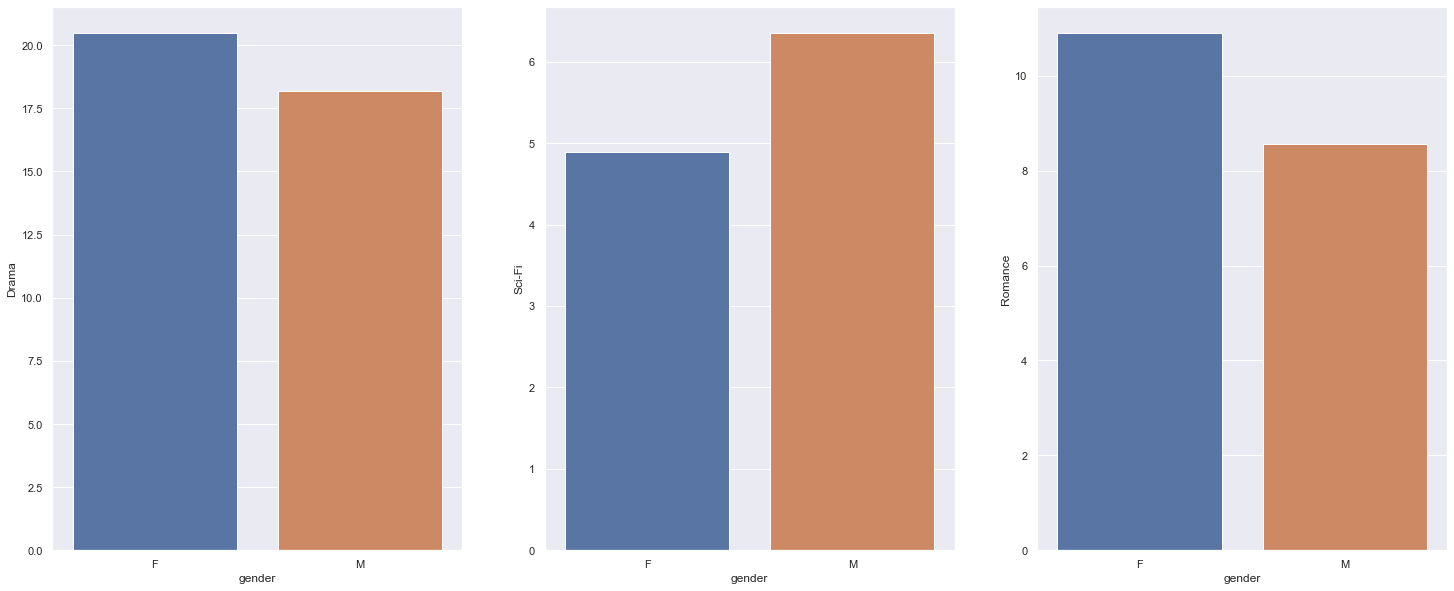

In [26]:
#To visualize the results better:
df_gender_vis=df_gender.iloc[:,0:].div(df_gender['total gender'], axis=0)*100

plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.barplot(df_gender_vis.index,df_gender_vis['Drama'])
plt.subplot(1,3,2)
sns.barplot(df_gender_vis.index,df_gender_vis['Sci-Fi'])
plt.subplot(1,3,3)
sns.barplot(df_gender_vis.index,df_gender_vis['Romance'])